# ANLY590-HW2
# Ze Zheng

## Problem 1 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import pandas as pd
from IPython.display import Image

### 1.1 

![title](question11.png)

### 1.2 

$a_{1i}=w_{1i1}x_1+w_{1i2}x_2+b_{1i};i=1,2,3$

$h_{1i}=max(0,a_{1i});i=1,2,3$

$a_{2j}=w_{21j}h_{11}+w_{22j}h_{12}+w_{23j}h_{13}+b_{2j};j=1,2$

$h_{2j}=max(0,a_{2j});j=1,2$

$a_{3k}=w_{31k}h_{21}+w_{32k}h_{22}+b_{3k};k=1,2,3$

$y_{k}=softmax(a_{3k});n=1,2,3$

$\hat{y} = softmax(\max(\max(XW_1+b_1,0)W_2+b_2,0)W_3+c)$ where $softmax(x_i) =  \frac{e^x_i}{\sum_{i = 1}^{n} e^x_i}$

### 1.3 

In [5]:
def relu(x):
    return np.maximum(x,0)

def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis = 1))[:,np.newaxis]

def ff_nn_2_ReLu(x,w1,w2,w3,b1,b2,c):
    a = np.dot(w1,x)+b1
    h1 = relu(a)
    z = np.dot(w2,h1)+b2
    h2 = relu(z)
    y = softmax(np.dot(w3,h2)+c)
    return y

### 1.4 

In [6]:
w1 = np.array([[1,0],[-1,0],[0,0.5]])
w2 = np.array([[1,0,0],[-1,-1,0]])
w3 = np.array([[1,1],[0,0],[-1,-1]])
b1 = np.array([[0,0,1]]).T
b2 = np.array([[1,-1]]).T
c = np.array([[1,0,0]]).T
x = np.array([[1,0,0],[-1,-1,1]])

ff_nn_2_ReLu(x,w1,w2,w3,b1,b2,c)

array([[0.57611688, 0.21194156, 0.21194156],
       [0.33333333, 0.33333333, 0.33333333],
       [0.1553624 , 0.4223188 , 0.4223188 ]])

## Problem 2 

## 2.1 

$\frac{df(x,y)}{dx} = 2*(1-x)*(-1) + 200*(y-x^2)*(-2x) = -2(1-x)-400x(y-x^2)$
$\frac{df(x,y)}{dy} = 0+200*(y-x^2)*(1) = 200(y-x^2)$

### 2.2

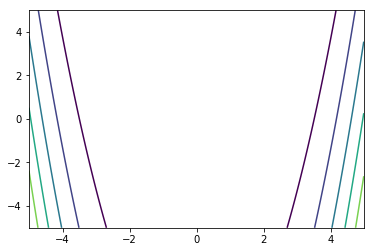

In [69]:
delta=0.025
x=np.arange(-5, 5, delta)
y=np.arange(-5, 5, delta)
X,Y=np.meshgrid(x,y)

Z = (1-X)**2 + 100*(Y-X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

### 2.3

In [82]:
def grad_f(vector):
    x, y = vector
    df_dx = 2*(200*x**3-200*x*y+x-1) 
    df_dy = 200*(y-x**2)
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-5,4,size=2)
    trajectory = [point]
        
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

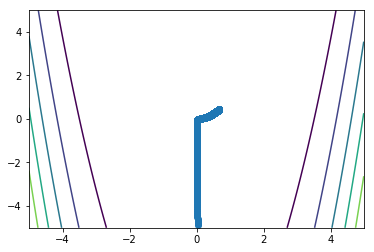

In [83]:
traj = grad_descent(iterations=10000,learning_rate = 0.0001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

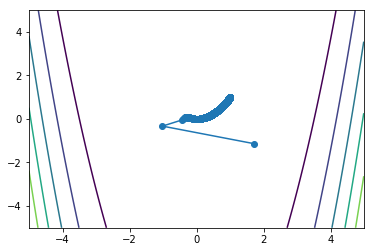

In [84]:
traj = grad_descent(iterations=10000,learning_rate = 0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### 2.4

In [95]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-5,4,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

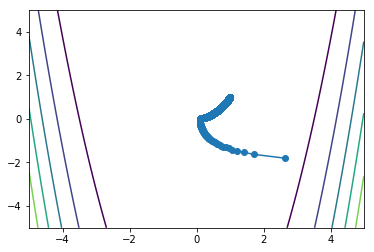

In [96]:
traj = grad_descent_with_momentum(iterations=100000, epsilon=0.0001, alpha=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

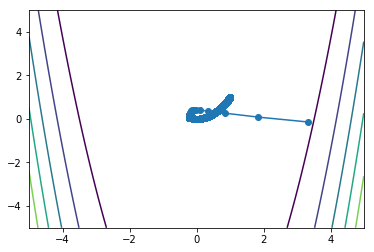

In [97]:
traj = grad_descent_with_momentum(iterations=100000, epsilon=0.0001, alpha=0.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## Problem 3

## 3.1

The parameters are $W^1,W^2,W^3,b^1,b^2,b^3$ which are all vectors.

According to the euquations of backpropagation, we got the following

$\delta ^L=\bigtriangledown_aL \odot \sigma'(z^L)$

$\delta ^l=((w^{l+1})^T\delta^{l+1})\odot \sigma'(z^l)$

$\frac{\partial L}{\partial b^l_j}=\delta^l_j$

$\frac{\partial L}{\partial w^l_{jk}}=a^{l-1}_k\delta^l_j$

The bias weights: $\frac{\partial L}{\partial b^l_j}=\delta^l_j=\hat y-y$

$\frac{\partial L}{\partial b^3}=\delta^3=\frac{\partial L}{\partial \hat y}=\hat y-y$

$\frac{\partial L}{\partial w^3}=a^2\delta ^3=a^2(\hat y-y)$

$\frac{\partial L}{\partial b^2}=\delta ^2=((w^{3})^T\delta^{3})\odot \sigma'(z^2)=((w^{3})^T(\hat y-y))\odot ReLu'(z^2)$

$\frac{\partial L}{\partial w^2}=a^1\delta^2=a^1((w^{3})^T(\hat y-y))\odot ReLu'(z^2)$$

$\frac{\partial L}{\partial b^1}=\delta^1=((w^{2})^T\delta^{2})\odot ReLu'(z^1)$

$\frac{\partial L}{\partial w^1}=x\delta^1=x((w^{2})^T\delta^{2})\odot ReLu'(z^1)$

## 3.2

In [110]:
def weight_matrix_to_vector(w_1, w_2, v, b_1, b_2, c):
    w1_11, w1_12, w1_21, w1_22, w1_31, w1_32 = w_1[0,0], w_1[0,1], w_1[1,0], w_1[1,1], w_1[2,0], w_1[2,1]
    b1_1, b1_2, b1_3 = np.squeeze(b_1[0]), np.squeeze(b_1[1]), np.squeeze(b_1[2]) 
    w2_11, w2_12, w2_13, w2_21, w2_22, w2_23 = w_2[0,0], w_2[0,1], w_2[0,2], w_2[1,0], w_2[1,1], w_2[1,2]
    b2_1, b2_2 = np.squeeze(b_2[0]), np.squeeze(b_2[1])
    v_11, v_12, v_21, v_22, v_31, v_32 = v[0,0], v[0,1], v[1,0], v[1,1], v[2,0], v[2,1]
    c_1, c_2, c_3 = np.squeeze(c[0]), np.squeeze(c[1]), np.squeeze(c[2])
    return np.array([w1_11, w1_12, w1_21, w1_22, w1_31, w1_32, b1_1, b1_2, b1_3, w2_11, w2_12, w2_13, w2_21, w2_22, w2_23
                     ,b2_1, b2_2, v_11, v_12, v_21, v_22, v_31, v_32, c_1, c_2, c_3])

def weight_vector_to_matrix(param_vec):
    w1_11, w1_12, w1_21, w1_22, w1_31, w1_32, b1_1, b1_2, b1_3, \
    w2_11, w2_12, w2_13, w2_21, w2_22, w2_23, b2_1, b2_2, \
    v_11, v_12, v_21, v_22, v_31, v_32, c_1, c_2, c_3 = param_vec
    w_1 = np.array([[w1_11, w1_12],[w1_21, w1_22], [w1_31, w1_32]])
    b_1 = np.array([[b1_1],[b1_2],[b1_3]])
    w_2 = np.array([[w2_11, w2_12, w2_13], [w2_21, w2_22, w2_23]])
    b_2 = np.array([[b2_1], [b2_2]])
    v = np.array([[v_11, v_12],[v_21, v_22], [v_31, v_32]])
    c = np.array([[c_1], [c_2], [c_3]])
    return ((w_1, w_2, v, b_1, b_2, c))

def grad_f(weight_vector, x, y):
    x = x.T # x (2,n)
    w_1, w_2, v, b_1, b_2, c = weight_vector_to_matrix(weight_vector) 
    z_1 = np.dot(w_1, x) + b_1 #(3,n)
    h_1 = ReLu(z_1) #(3,n)
    z_2 = np.dot(w_2, h_1) + b_2 #(2,n)
    h_2 = ReLu(z_2) #(2,n)
    z_3 = np.dot(v, h_2) + c #(3,n)
    y_hat = softmax(z_3).T #(n, 3)
    
    dv = h_2.dot((y_hat-y)).T
    dc = (y_hat-y).sum(axis = 0).reshape(3,1)
    dw2 = (((y_hat-y).dot(v)).T * (h_2 > 0)).dot(h_1.T)
    db2 = (((y_hat - y).dot(v)).T * (h_2 > 0)).sum(axis=1).reshape(2,1)
    dw1 = ((w_2.T.dot(  (((y_hat-y).dot(v)).T * (h_2 > 0))  )) * (h_1 > 0)).dot(x.T)
    db1 = ((w_2.T.dot(  (((y_hat-y).dot(v)).T * (h_2 > 0))  )) * (h_1 > 0)).sum(axis = 1).reshape(3,1)
    
    derivitive_vector = weight_matrix_to_vector(dw1, dw2, dv, db1, db2, dc)    
    return np.array(derivitive_vector)


## 3.3

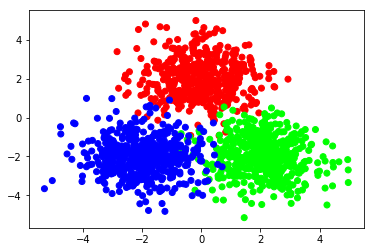

In [111]:
covm = [[1,0],[0,1]]
x1 = np.random.multivariate_normal(mean = [0,2],cov = covm,size = 500)
x2 = np.random.multivariate_normal(mean = [2,-2],cov = covm,size = 500)
x3 = np.random.multivariate_normal(mean = [-2,-2],cov = covm,size = 500)
x = np.concatenate((x1,x2,x3))
y1 = np.array([[1,0,0] for i in range(500)])
y2 = np.array([[0,1,0] for i in range(500)])
y3 = np.array([[0,0,1] for i in range(500)])
y = np.concatenate((y1,y2,y3))
plt.scatter(x[:,0], x[:,1],c=y)

## 3.4

In [112]:
def grad_descent(x, y, parameters, iterations=10, learning_rate=0.2):
    point = parameters
    trajectory = [point]
    losses = [loss(y, forward(x,point)[0])]
    
    for i in range(iterations):
        y_hat = forward(x,point)[0]
        grad = grad_f(x, y,point)
        point= np.subtract(point,[j*learning_rate for j in grad])
        trajectory.append(point)
        losses.append(loss(y, forward(x,point)[0]))
    return (np.array(trajectory), losses)



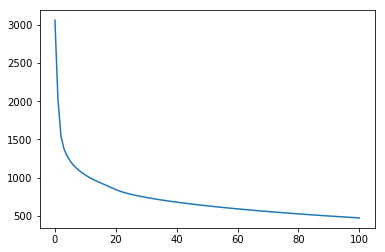

In [114]:
def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return  -tot.sum()

def ReLu(x):
    return np.maximum(x,0)

def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=0))[np.newaxis,:]

def ff_nn_2_ReLu(x, w_1, w_2, v, b_1, b_2, c):
    z_1 = np.dot(w_1, x) + b_1
    h_1 = ReLu(z_1)
    z_2 = np.dot(w_2, h_1) + b_2
    h_2 = ReLu(z_2)
    z_3 = np.dot(v, h_2) + c
    return softmax(z_3)

def grad_descent(x, y, iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=26)
    trajectory = [point]
    losses = [loss(y, ff_nn_2_ReLu(x.T, *weight_vector_to_matrix(point)).T)]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, ff_nn_2_ReLu(x.T, *weight_vector_to_matrix(point)).T))
    return (np.array(trajectory), losses)

    traj, losses = grad_descent(x, y, iterations=1000,learning_rate=0.0001)
plt.plot(losses)
plt.show()

## 3.5

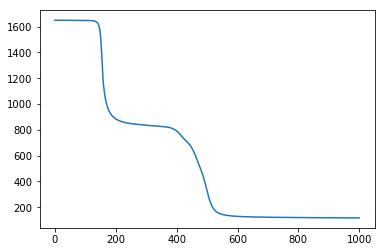

In [115]:
def grad_descent_with_momentum(x, y, starting_point=None, iterations=10, alpha=.9, epsilon=1e-4):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-.1,.1,size=26)
    trajectory = [point]
    losses = [loss(y, ff_nn_2_ReLu(x.T, *weight_vector_to_matrix(point)).T)]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, ff_nn_2_ReLu(x.T, *weight_vector_to_matrix(point)).T))
    return (np.array(trajectory), losses)

traj, losses = grad_descent_with_momentum(x, y, iterations=1000,alpha=.5, epsilon = 0.0001)
plt.plot(losses)
plt.show()